Confusion Matrix for Random Forest: 
[[20  0  3  0  1  1  0]
 [ 1 14  0  0  0  1  0]
 [ 0  0 34  0  0  0  0]
 [ 0  0  0 26  0  0  0]
 [ 0  0  0  0 16  0  0]
 [ 0  2  0  0  0 48  0]
 [ 0  0  0  0  0  0 24]]
Random Forest Accuracy: 95.29%
Random Forest Precision: 94.96%
Random Forest Recall: 94.79%
Random Forest F1_score: 94.74%
                               precision    recall  f1-score   support

            Basilar-type aura       0.95      0.80      0.87        25
 Familial hemiplegic migraine       0.88      0.88      0.88        16
        Migraine without aura       0.92      1.00      0.96        34
                        Other       1.00      1.00      1.00        26
 Sporadic hemiplegic migraine       0.94      1.00      0.97        16
   Typical aura with migraine       0.96      0.96      0.96        50
Typical aura without migraine       1.00      1.00      1.00        24

                     accuracy                           0.95       191
                    macro avg 

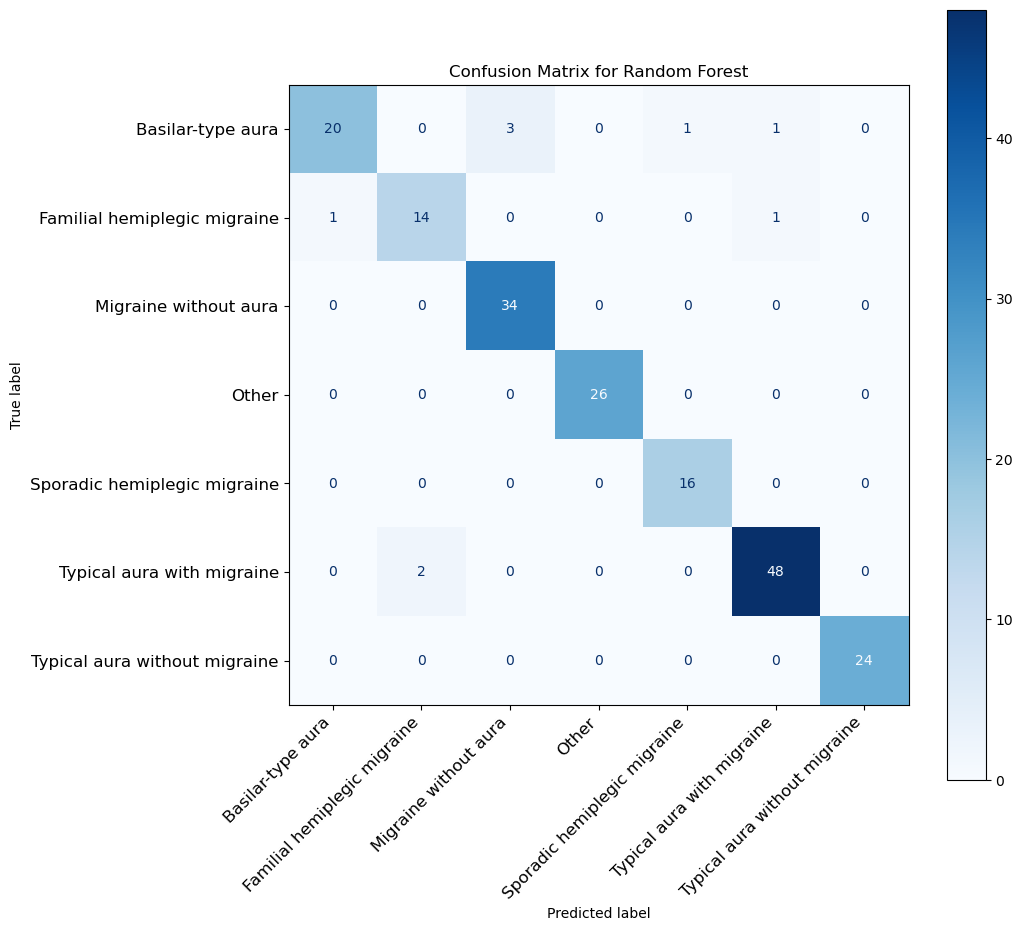

Cross-validation Accuracy Scores: [0.90575916 0.94764398 0.91099476 0.90526316 0.93684211]
Mean Cross-validation Accuracy: 92.13%


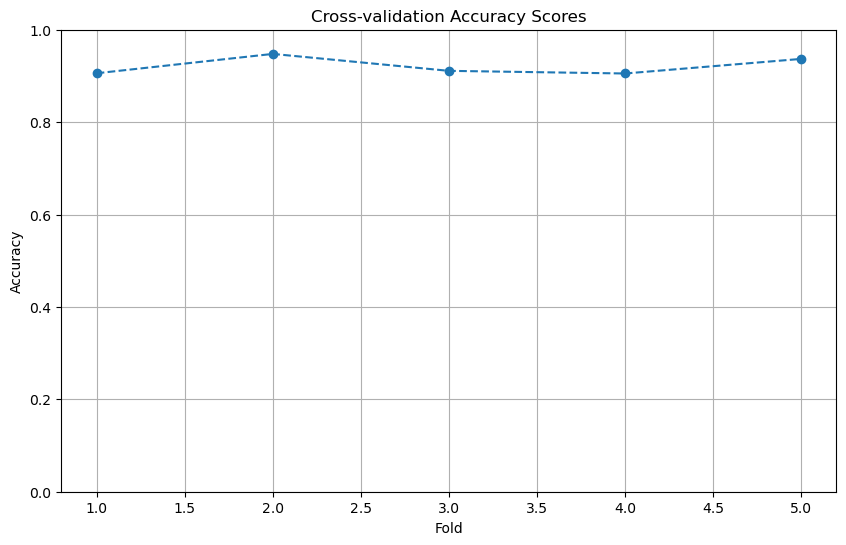

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, precision_score, f1_score

# Load and preprocess the dataset
df = pd.read_csv("balanced_migraine_data.csv")
df = df.drop_duplicates()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])

# Feature Engineering
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k="all")
X = selector.fit_transform(X, y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Define the classifier
classifier = RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200)

# Train the classifier and predict
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix for Random Forest: \n{cm}")
print(f"Random Forest Accuracy: {accuracy*100:.2f}%")
print(f"Random Forest Precision: {precision*100:.2f}%")
print(f"Random Forest Recall: {recall*100:.2f}%")
print(f"Random Forest F1_score: {f1*100:.2f}%")
print(classification_report(y_test, y_pred))
print("-" * 30)

# Plot the confusion matrix with shades of light blue
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size to avoid overlap
disp.plot(ax=ax, cmap='Blues')  # Use 'Blues' colormap for shades of light blue
plt.title("Confusion Matrix for Random Forest")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {np.mean(cv_scores)*100:.2f}%")

# Plot cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--')
plt.title('Cross-validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)
plt.show()


Logistic Regression Accuracy: 80.10%
Random Forest Accuracy: 75.92%
Gradient Boosting Classifier Accuracy: 83.25%
K-Nearest Neighbors Accuracy: 77.49%
Decision Tree Accuracy: 76.44%


C:\Users\DIYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


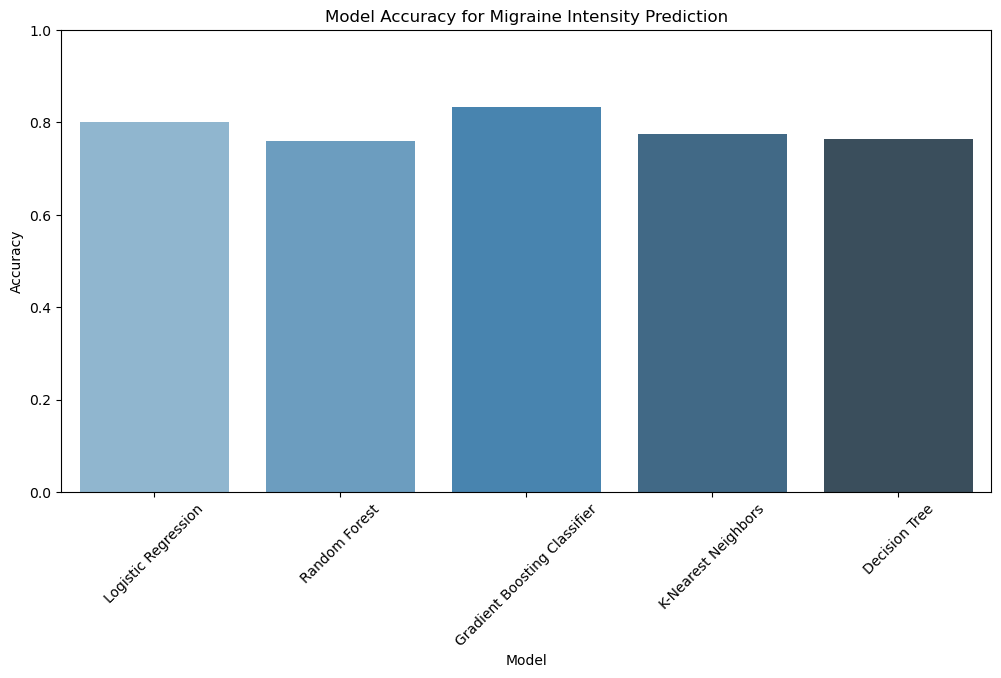

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load and prepare the dataset
df = pd.read_csv("balanced_migraine_data.csv")
df = df.drop_duplicates()

label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])

X = df.drop(columns=['Intensity'])
y_intensity = df['Intensity']  
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X, y_intensity, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_int = scaler.fit_transform(X_train_int)
X_test_int = scaler.transform(X_test_int)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=3),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Fit models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_int, y_train_int)
    y_pred = model.predict(X_test_int)
    accuracy = accuracy_score(y_test_int, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name} Accuracy: {accuracy*100:.2f}%")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Blues_d")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Migraine Intensity Prediction')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


Correlation Matrix:
                  Age  Duration  Frequency  Location  Character  Intensity  \
Age          1.000000  0.052825   0.171430  0.225382   0.223659   0.288101   
Duration     0.052825  1.000000   0.182713  0.010149  -0.003861   0.050653   
Frequency    0.171430  0.182713   1.000000 -0.050268  -0.023529   0.085764   
Location     0.225382  0.010149  -0.050268  1.000000   0.916006   0.775723   
Character    0.223659 -0.003861  -0.023529  0.916006   1.000000   0.760995   
Intensity    0.288101  0.050653   0.085764  0.775723   0.760995   1.000000   
Nausea      -0.092921 -0.158639   0.042917 -0.017808  -0.026818  -0.072903   
Vomit        0.037643 -0.077855   0.161234  0.072368   0.086956   0.099017   
Phonophobia -0.313384  0.013747   0.085686 -0.311696  -0.427540  -0.277393   
Photophobia -0.189693  0.021863   0.038725 -0.250705  -0.414966  -0.245282   
Visual      -0.109740  0.037197  -0.169798 -0.523039  -0.534176  -0.594122   
Sensory     -0.030952 -0.141921  -0.053625 -

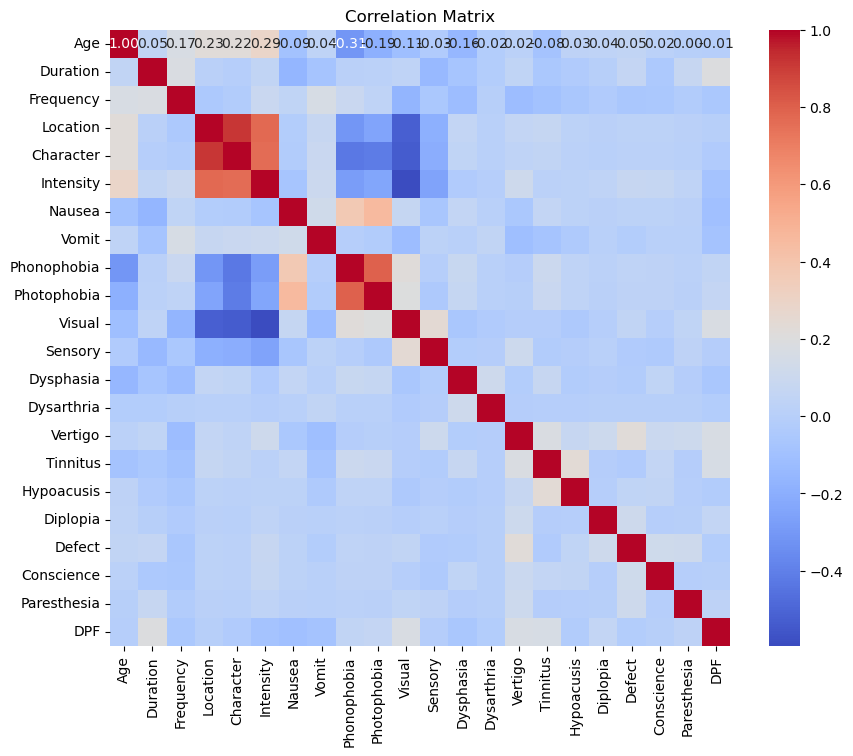

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
df = pd.read_csv('balanced_migraine_data.csv')

# Remove the column named "Ataxia"
df = df.drop(columns=['Ataxia'])

# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
